### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

2024-06-05 14:54:24.079518: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 14:54:24.164511: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 14:54:24.164575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 14:54:24.167126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-05 14:54:24.180254: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 14:54:24.181636: I tensorflow/core/platform/cpu_feature_guard.cc:1

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3000, 3000) and arg 2 with shape (150, 150).

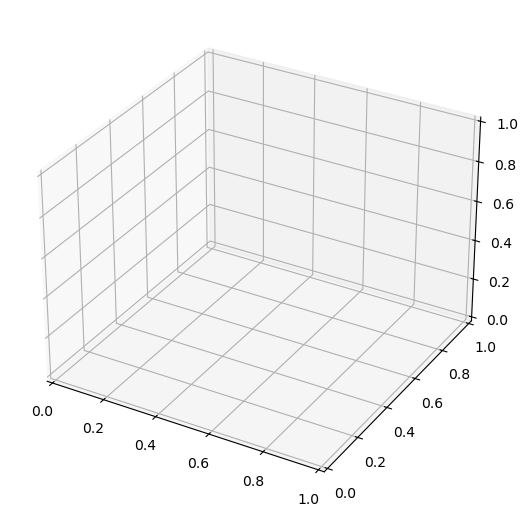

In [6]:
# target parameters of f(x,y) = sin(x^2 + y^2)
# generate training inputs

# Polynomial function
def f(x, y):
    return np.sin(x**2 + y**2)

# 2D function
np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, 3000)
y_train = np.random.uniform(-3/2, 3/2, 3000)
X_train,Y_train = np.meshgrid(x_train, y_train) # grid of point
x_valid = np.random.uniform(-3/2, 3/2, 150)
y_valid = np.random.uniform(-3/2,, 150)
X_valid,Y_valid = np.meshgrid(x_valid, y_valid) # grid of point

sigma = 0.1 # noise standard deviation

Z_target = f(X_valid, Y_valid) # ideal (target) function
Z_valid = np.random.normal(f(X_valid,Y_valid),sigma)
Z_train = np.random.normal(f(X_train, Y_train),sigma)

# Creating 3D plot of the target function
fig = plt.figure(figsize = (14, 7))
ax1 = fig.add_subplot(121, projection='3d')
# ax2 = fig.add_subplot(121, projection='3d')

ax1.plot_surface(X_valid, Y_valid, Z_target, cmap='viridis',edgecolor='none', label = r'Target function: $f(x,y) = sin(x^2 + y^2)$')
ax2.scatter(X_valid,Y_valid,Z_valid, c=Z_valid, marker='.', label = 'Validation data')
plt.legend()
plt.grid(True)
plt.show()